In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from nnf import NNF
from inpainting import InpaintNNF

In [2]:
def test_reshuffling(src_path, mask_path, patch_w=7, max_pm_iters=5):
    src_img = cv2.imread(src_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.where(mask > 127, 1, 0).astype(np.uint8)

    inpainter = InpaintNNF(src_img, mask, patch_w=patch_w, max_pm_iters=max_pm_iters)
    inpainted_images = inpainter.inpaint()

    sources = []
    masks =[]

    for i in range(len(inpainter.pyramid)):
        sources.append(inpainter.pyramid[i][0])
        masks.append(inpainter.pyramid[i][1])

    return inpainted_images, sources, masks

In [ ]:
def plot_images_level_wise(inpainted_images, sources, masks):
    length = len(inpainted_images)
    fig, ax = plt.subplots(length, 3, figsize=(12, 12))

    for i in range(length):
        level = length - i - 1
        img_shape = sources[i].shape

        ax[level, 0].imshow(cv2.cvtColor(sources[i], cv2.COLOR_BGR2RGB))
        ax[level, 0].set_title('Source at Level {} ({}x{})'.format(i + 1, img_shape[1], img_shape[0]))
        ax[level, 0].axis('off')

        mask_to_plot = masks[i].copy()

        mask_to_plot = (mask_to_plot * 255).astype(np.uint8)
        mask_to_plot = cv2.cvtColor(mask_to_plot, cv2.COLOR_GRAY2RGB)
        
        ax[level, 1].imshow(mask_to_plot, cmap='gray')
        ax[level, 1].set_title('Mask at Level {}'.format(i + 1))
        ax[level, 1].set_xticks([])
        ax[level, 1].set_yticks([])
        

        ax[i, 2].imshow(cv2.cvtColor(inpainted_images[i], cv2.COLOR_BGR2RGB))
        ax[i, 2].set_title('Inpainted Image at Level {}'.format(level+1))
        ax[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

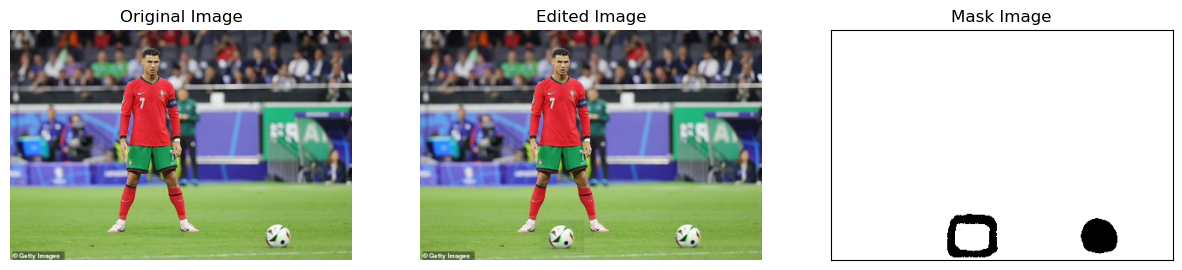

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
orig_img = cv2.imread('../images/ronaldo_orig.png')
edit_img = cv2.imread('../images/ronaldo_edit.png')
mask_img = cv2.imread('../images/ronaldo_mask.png', cv2.IMREAD_GRAYSCALE)
axs[0].imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(edit_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Edited Image')
axs[1].axis('off')
axs[2].imshow(mask_img, cmap='gray')
axs[2].set_title('Mask Image')
axs[2].set_xticks([])
axs[2].set_yticks([])
plt.show()

In [6]:
src_path = "../images/ronaldo_edit.png"
mask_path = "../images/ronaldo_mask.png"
inpainted_images, sources, masks = test_reshuffling(src_path, mask_path)

Level 6 done in 0.06959009170532227 seconds.
Level 5 done in 0.3674750328063965 seconds.
Level 4 done in 2.5016839504241943 seconds.
Level 3 done in 9.992562770843506 seconds.
Level 2 done in 30.503786087036133 seconds.
Level 1 done in 114.86393880844116 seconds.


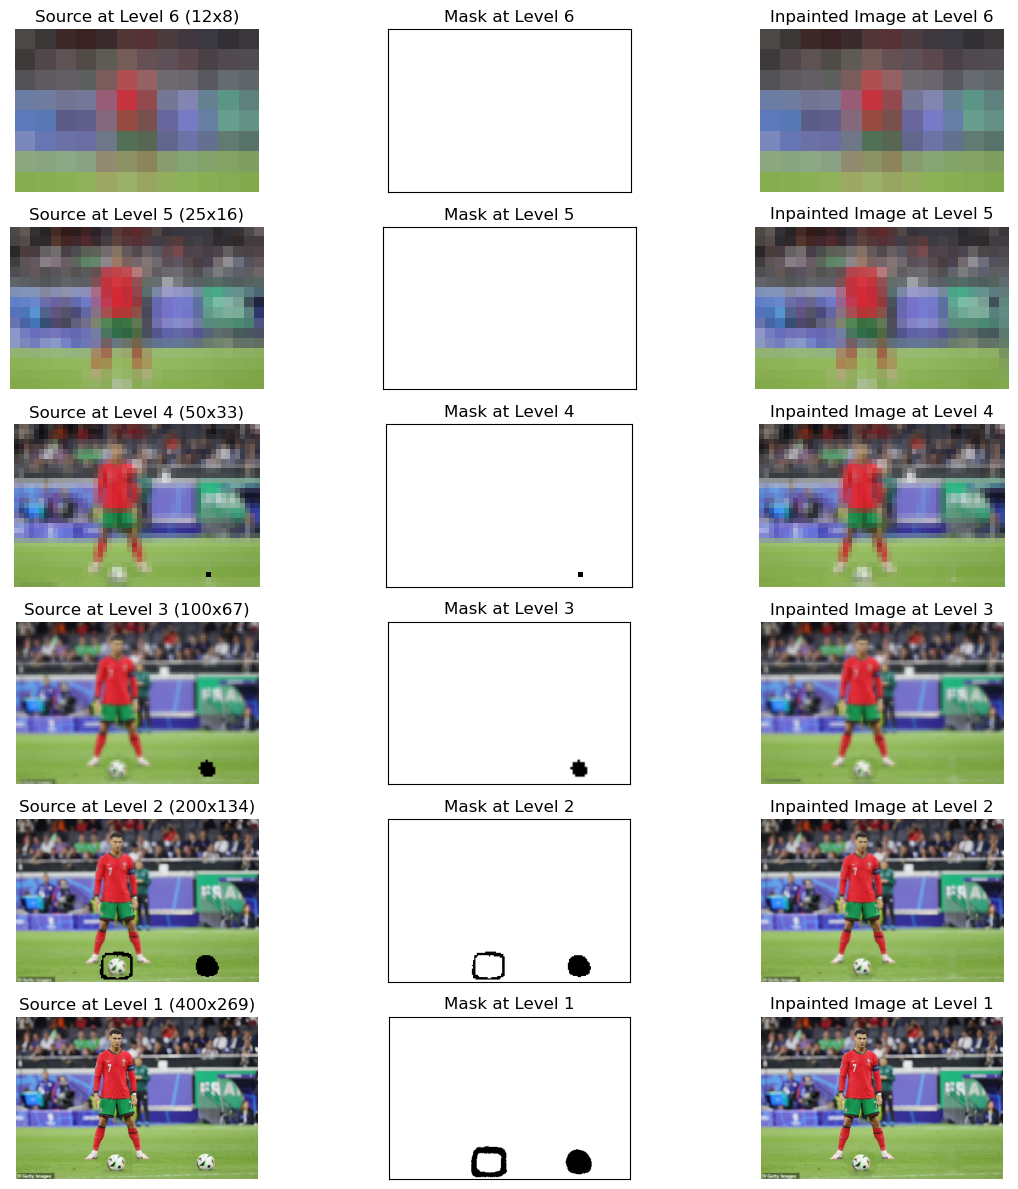

In [7]:
plot_images_level_wise(inpainted_images, sources, masks)

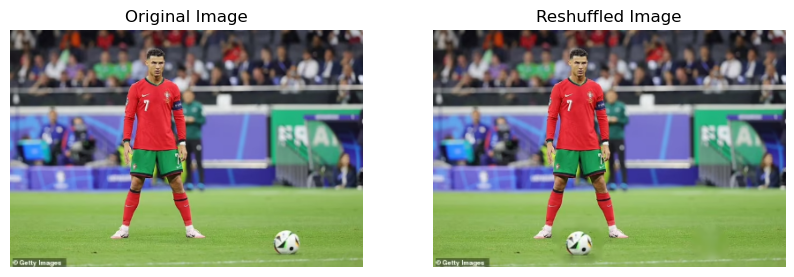

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(inpainted_images[-1], cv2.COLOR_BGR2RGB))
axs[1].set_title('Reshuffled Image')
axs[1].axis('off')
plt.show()

In [ ]:
import os

def run_hole_filling(image_path, hole_size=(60, 60), patch_w=7):
    """
    Demonstrates object removal / hole filling.
    Creates a hole in the center of the image and fills it.
    """
    source_img = cv2.imread(image_path)
    if source_img is None:
        print(f"Error: Could not load {image_path}")
        return

    if source_img.shape[0] > 300 or source_img.shape[1] > 300:
        source_img = cv2.resize(source_img, (300, 300))
        
    h, w, _ = source_img.shape
    
    mask = np.ones((h, w), dtype=np.uint8)
    
    hy, hx = hole_size
    cy, cx = h // 2, w // 2
    
    y1 = max(0, cy - hy//2)
    y2 = min(h, cy + hy//2)
    x1 = max(0, cx - hx//2)
    x2 = min(w, cx + hx//2)
    
    mask[y1:y2, x1:x2] = 0
    
    print(f"Running Hole Filling on {os.path.basename(image_path)}...")
    
    inpainter = InpaintNNF(source_img, mask, patch_w=patch_w, max_pm_iters=5)
    inpainted_images = inpainter.inpaint()
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(1-mask, cmap='gray')
    axs[1].set_title('Mask (White = Hole)')
    axs[1].axis('off')
    
    axs[2].imshow(cv2.cvtColor(inpainted_images[-1], cv2.COLOR_BGR2RGB))
    axs[2].set_title('Inpainted Result')
    axs[2].axis('off')
    
    plt.suptitle(f'Hole Filling for {os.path.basename(image_path)}', fontsize=16)
    plt.show()

Running Hole Filling on natural_sand.jpg...
Level 5 done in 0.1195840835571289 seconds.
Level 4 done in 0.7507338523864746 seconds.
Level 3 done in 5.1936540603637695 seconds.
Level 2 done in 20.13522171974182 seconds.
Level 1 done in 66.6120834350586 seconds.


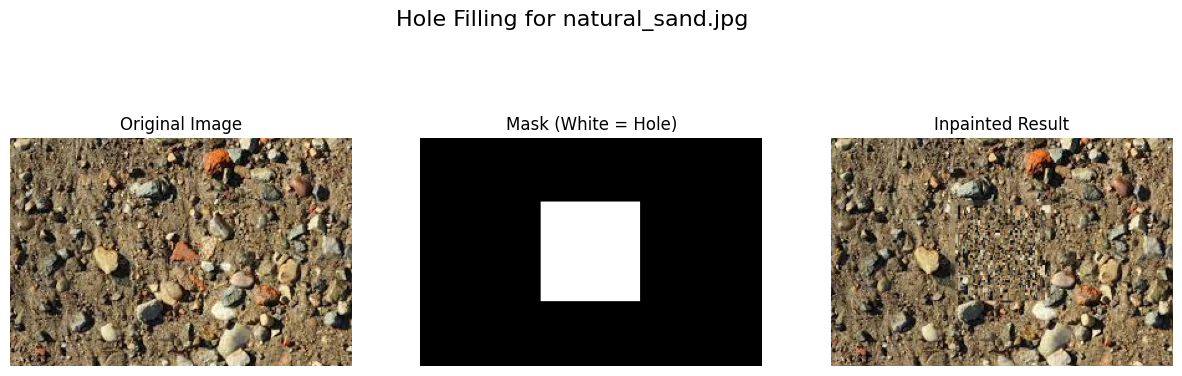

Running Hole Filling on stone.jpg...
Level 4 done in 0.601393461227417 seconds.
Level 3 done in 3.6284215450286865 seconds.
Level 2 done in 18.427623987197876 seconds.
Level 1 done in 67.09699988365173 seconds.


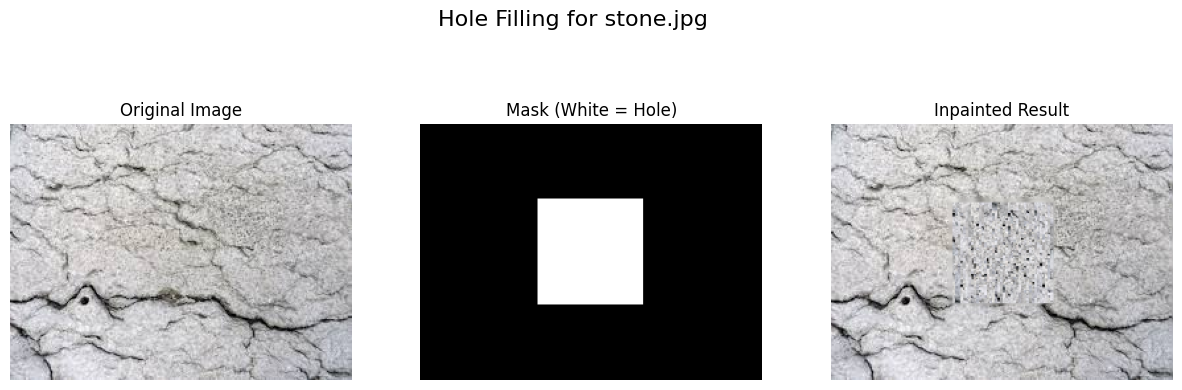

Running Hole Filling on grass.jpg...
Level 4 done in 0.5720229148864746 seconds.
Level 3 done in 3.5473740100860596 seconds.
Level 2 done in 18.796800136566162 seconds.
Level 1 done in 67.6746940612793 seconds.


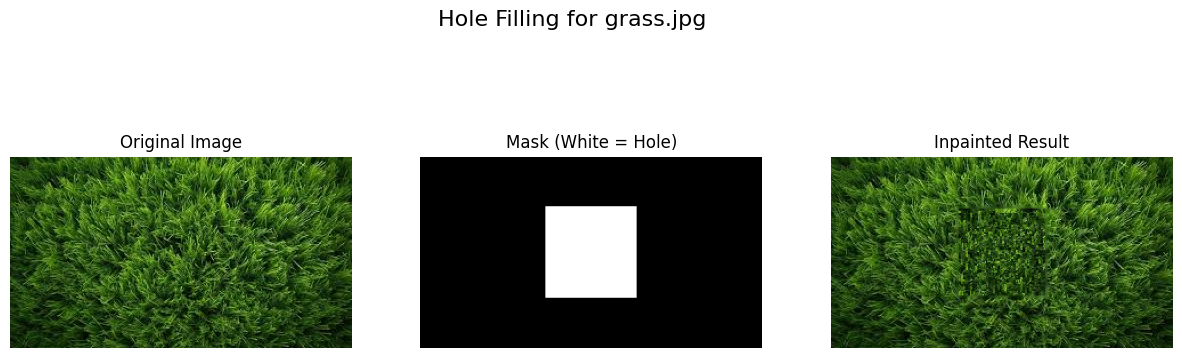

In [ ]:
run_hole_filling('../images/natural_sand.jpg', hole_size=(80, 80), patch_w=11)

run_hole_filling('../images/stone.jpg', hole_size=(80, 80), patch_w=15)

run_hole_filling('../images/grass.jpg', hole_size=(80, 80), patch_w=15)